<a href="https://colab.research.google.com/github/ParthaT123/My_repo1/blob/main/Loan_Approval_Example_tree_based_boosting_GBM_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 ## Import some libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
## Check the directory
import os

path = os.getcwd()

print(path)

/content


## Reading/Importing the data from Gdrive

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## For Gdrive and Colab

# Code to read csv file into Colaboratory:
# !pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
trn_link= 'https://drive.google.com/open?id=1zFBEiCJ081wRtXBdPjOn90bVQ9sa-ysY'
tst_link = 'https://drive.google.com/open?id=11xTe8DtaWiDw6OMpWoWOWSmt0qOdfDWE'
# https://drive.google.com/file/d/1zFBEiCJ081wRtXBdPjOn90bVQ9sa-ysY/view?usp=sharing
# https://drive.google.com/file/d/11xTe8DtaWiDw6OMpWoWOWSmt0qOdfDWE/view?usp=sharing

In [ ]:
fluff, id = trn_link.split('=')
print (id) # Verify that you have everything after '='

1zFBEiCJ081wRtXBdPjOn90bVQ9sa-ysY


In [ ]:
pwd

'/content'

In [ ]:
downloaded_trn = drive.CreateFile({'id':id}) 
downloaded_trn.GetContentFile('train_ctrUa4K.csv')  
train = pd.read_csv('train_ctrUa4K.csv')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
fluff, id = tst_link.split('=')
print (id) # Verify that you have everything after '='

11xTe8DtaWiDw6OMpWoWOWSmt0qOdfDWE


In [ ]:
downloaded_tst = drive.CreateFile({'id':id}) 
downloaded_tst.GetContentFile('test_lAUu6dG.csv')  
test = pd.read_csv('test_lAUu6dG.csv')
# Dataset is now stored in a Pandas Dataframe

## Data Dimension and Variable Types

**Data Description**

---



---

Loan_ID:	Unique Loan ID

Gender:	Male/ Female

Married:	Applicant married (Y/N)

Dependents:	Number of dependents

Education:	Applicant Education (Graduate/ Under Graduate)

Self_Employed:	Self employed (Y/N)

ApplicantIncome:	Applicant income

CoapplicantIncome:	Coapplicant income

LoanAmount:	Loan amount in thousands

Loan_Amount_Term:	Term of loan in months

Credit_History:	credit history meets guidelines

Property_Area:	Urban/ Semi Urban/ Rural

Loan_Status	(Target): Loan approved (Y/N)




In [ ]:
train.shape, test.shape

((614, 13), (367, 12))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
## Function for calculating missing percentages in a dataframe
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])



## Boxplot and Histogtam 
def histPlot(var, bins = None):
    plot = var.plot(kind='hist', title =var.name,use_index = True, alpha=0.5, bins=bins, figsize = (7,5))
    
def boxPlot(var):
    color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',  'medians': 'DarkBlue', 'caps': 'Gray'}
    plot = var.plot(kind='box', title =var.name,
                                               figsize = (7,7), color=color, sym='r+')
    
    
## Frequency Distribution Plot for Categorical Vars
def freq_dist_cat(var, fig_size = (None,None)):
    plot = var.value_counts(normalize=True).plot(kind='bar', title =var.name,
                                              use_index = True, figsize = fig_size)
    plot.set_ylabel("Freq Distn. of  "+ var.name)
    
def freq_dist_cat_idx_sort(var, fig_size = (None,None)):
    plot = var.value_counts(normalize=True).sort_index().plot(kind='bar', title =var.name,
                                              use_index = True, figsize = fig_size)
    plot.set_ylabel("Freq Distn. of  "+ var.name)

def var_distn(listVar):
    for i in range(len(listVar)):
        print("###############################")
        print(listVar[i])
        print("-------------------------------")
        print(train[['Loan_Status',listVar[i]]].groupby(listVar[i]).describe() )
        print("###############################")

def univar_dist(df,x, bins = None, kde = None):
    
    sns.set(style = 'ticks')
    f, (ax_box, ax_hist) = plt.subplots(2, sharex =True, gridspec_kw = {"height_ratios":(30,70)})
    ax_box.set_title(str(x), fontsize=16)

    sns.distplot(df[x], kde = kde, bins = bins, ax= ax_hist)
    sns.boxplot(df[x], ax = ax_box)

    ax_box.set(yticks = [])
    sns.despine(ax= ax_hist)
    sns.despine(ax= ax_box, left = True)

## Defining a function to look at Loan_Status across different bins of continuous variables
def freq_cont1var(dataframe, groupbycol1, aggregate_col,bins=None):
    
        
    df = pd.DataFrame(dataframe[[groupbycol1]])
    df = df.apply(lambda x: pd.qcut(x,  bins, duplicates  = "drop"), axis=0)
    df = pd.DataFrame(df)
    df = pd.DataFrame(df.join(dataframe[aggregate_col]))
    crs1 = df.groupby(groupbycol1).mean()*100
    crs1 = crs1.reset_index(drop = False)

    print(crs1)
    return crs1

def bivar_plt(df, var , bins = None):
    print("Variable Name : " + str(var) + "(by Approval Pct of Loan)")
    print("#######################################################################") 
    age = freq_cont1var(df, var, "Loan_Status", bins)
    print("#######################################################################")
    print("\n")
    print("#######################################################################")
    # age.plot.bar(x=var, y='Loan_Status', rot=0, figsize = (12,5),color = "maroon")

## Simple EDA and Dummy Variable Creation

In [ ]:
## The dependent variable "Loan_status"

In [ ]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
# Transforming to make it binary (1/0) type
train['Loan_Status'] = np.where(train['Loan_Status'] == 'Y',1, 0) # the sklearn gbm or xgboost does not work with categorical predictor, in practice most of the ML algos does not

In [ ]:
train['Loan_Status'].value_counts(), train['Loan_Status'].mean()

(1    422
 0    192
 Name: Loan_Status, dtype: int64, 0.6872964169381107)

In [ ]:
#  Finding out the numerical and categorical variables before doing any further analysis
target_name = 'Loan_Status'
id_name = 'Loan_ID'
num_columns = train.select_dtypes(include = ['int','float64','int32','float64','int64']).columns
num_columns = np.setdiff1d(num_columns,target_name)
print("The continuous/numerical columns are:  ", num_columns)

print("------------------------------------------------------------------------------------------------------------------")
cat_columns = train.select_dtypes(include = ['object','category']).columns
cat_columns = np.setdiff1d(cat_columns,id_name)
print("The nominal/categorical columns are:  ", cat_columns)

The continuous/numerical columns are:   ['ApplicantIncome' 'CoapplicantIncome' 'Credit_History' 'LoanAmount'
 'Loan_Amount_Term']
------------------------------------------------------------------------------------------------------------------
The nominal/categorical columns are:   ['Dependents' 'Education' 'Gender' 'Married' 'Property_Area'
 'Self_Employed']


In [ ]:
train.describe() # just for numerical vars

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [ ]:
train[cat_columns].describe() # for categorical vars

,Dependents,Education,Gender,Married,Property_Area,Self_Employed
count,599,614,601,611,614,582
unique,4,2,2,2,3,2
top,0,Graduate,Male,Yes,Semiurban,No
freq,345,480,489,398,233,500


In [ ]:
missing_data(train)

,Total,Missing Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


Seems Credit History has the highest number/percentage of missing values. Since this is a binary variable (1 as meeting guidelines and 0 as not meeting guidelines of credit history), we can replace the missing values with zero. There can be other school of thoughts like this is not the most efficient way  to replace missing values one should use other imputation techniques. 

I agree a single problem should be viewed in different ways and the best logical solution should be chosen. I am choosing the easiest one :-), assuming that the people with missing history does not have one. Although in some ML algorithm one can specify that it is a missing value or replace with a distant negative value (sometimes works for tree algorithms, which we would use later, again notb the best approach but helpfun in some situations)

In [ ]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
## Replace  missing with zero
train['Credit_History'] = train['Credit_History'].fillna(0)

In [ ]:
train.corr() ## only for numerical variables as of now

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,0.006986,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.058795,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.035156,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.005550,-0.021268
Credit_History,0.006986,-0.058795,-0.035156,0.005550,1.000000,0.432616
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.432616,1.000000


In [ ]:
train.corr(method ='spearman')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.320056,0.515397,-0.040111,0.050962,-0.004162
CoapplicantIncome,-0.320056,1.000000,0.240719,-0.013747,-0.043314,0.034960
LoanAmount,0.515397,0.240719,1.000000,0.041486,-0.017398,-0.034984
Loan_Amount_Term,-0.040111,-0.013747,0.041486,1.000000,0.021359,-0.026422
Credit_History,0.050962,-0.043314,-0.017398,0.021359,1.000000,0.432616
Loan_Status,-0.004162,0.034960,-0.034984,-0.026422,0.432616,1.000000


We see that the loan amount is positive correlated with income related variables. Also, having a Credit History should help in bagging the Loan, which is brought out by the positive correlation with Loan Status. 

Now, its little tricky when we are assessing the relationship of two binary variables with Pearson's Correlation , so I calculated Spearman's Correlation too.

In [ ]:
cat_columns

array(['Dependents', 'Education', 'Gender', 'Married', 'Property_Area',
       'Self_Employed'], dtype=object)

In [ ]:
train.Loan_Status.mean()

0.6872964169381107

### Trying to create few dummy variables with respect the categorical variables

In [ ]:
var_distn(cat_columns)
# We would see the 5-point summary of the Loan Status across all the categorical variables, this will help us in creating 

###############################
Dependents
-------------------------------
           Loan_Status                                             
                 count      mean       std  min  25%  50%  75%  max
Dependents                                                         
0                345.0  0.689855  0.463225  0.0  0.0  1.0  1.0  1.0
1                102.0  0.647059  0.480245  0.0  0.0  1.0  1.0  1.0
2                101.0  0.752475  0.433727  0.0  1.0  1.0  1.0  1.0
3+                51.0  0.647059  0.482640  0.0  0.0  1.0  1.0  1.0
###############################
###############################
Education
-------------------------------
             Loan_Status                                             
                   count      mean       std  min  25%  50%  75%  max
Education                                                            
Graduate           480.0  0.708333  0.455004  0.0  0.0  1.0  1.0  1.0
Not Graduate       134.0  0.611940  0.489137  0.0  0.0  1.0  1.

In [ ]:
train['Dependents'].value_counts(), train['Dependents'].unique()

(0     345
 1     102
 2     101
 3+     51
 Name: Dependents, dtype: int64,
 array(['0', '1', '2', '3+', nan], dtype=object))

In [ ]:
train["Dependents_0"] = np.where(train['Dependents'].isin(['0']),1,0)
# train["Dependents_1"] = np.where(train['Dependents'].isin(['1']),1,0)
# train["Dependents_2+"] = np.where(train['Dependents'].isin(['2','3+']),1,0)

In [ ]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
train["Education_Not_Grad"] = np.where(train['Education'].isin(['Not Graduate']),1,0)

In [ ]:
train["Gender_Female"] = np.where(train['Gender'].isin(['Female']),1,0)

In [ ]:
train['Married_No'] = np.where(train['Married'].isin(['No']),1,0)

In [ ]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
train['Property_Area_SemiUrban'] = np.where(train['Property_Area'].isin(['Semiurban']),1,0)
train['Property_Area_Rural'] = np.where(train['Property_Area'].isin(['Rural']),1,0)

In [ ]:
train['Self_Employed'] = np.where(train['Self_Employed'].isin(['Yes']),1,0)

Ratio of loan amount and total income would tell about the riskiness of the customer. A customer can be assumed to be less risky if the ratio is lower, since his/her chances of defaulting would be lower

In [ ]:
train['LoanAmount_Income'] = train['LoanAmount']/(train['ApplicantIncome']+ train['CoapplicantIncome'])

Ratio of loan amount to loan term would tell us about the approximate EMI of the customer. 

In [ ]:
 train['LoanAmount_Term'] = train['LoanAmount']/train['Loan_Amount_Term']

In [ ]:
new_num_cols = train.select_dtypes(include = ['int','float64','int32','float64','int64']).columns
new_num_cols

Index(['Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Dependents_0',
       'Education_Not_Grad', 'Gender_Female', 'Married_No',
       'Property_Area_SemiUrban', 'Property_Area_Rural', 'LoanAmount_Income',
       'LoanAmount_Term'],
      dtype='object')

In [ ]:
cols = ['Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Dependents_0',
       'Education_Not_Grad', 'Gender_Female', 'Married_No',
       'Property_Area_SemiUrban', 'Property_Area_Rural', 'LoanAmount_Income',
       'LoanAmount_Term']

Univariate Distribution for continuous variables

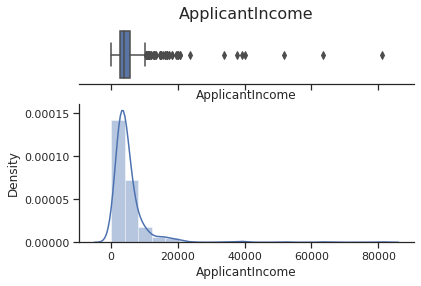

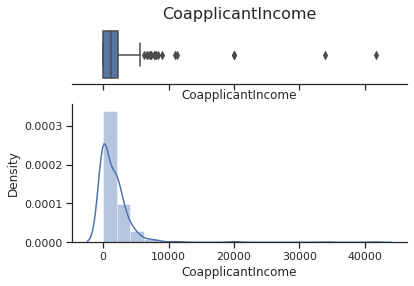

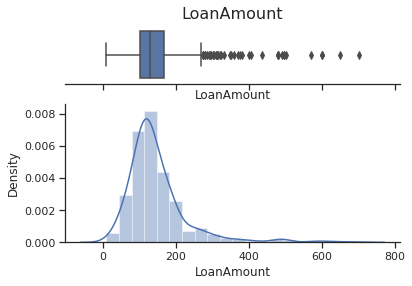

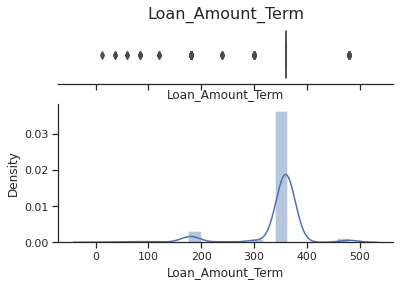

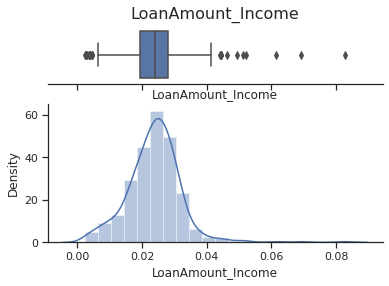

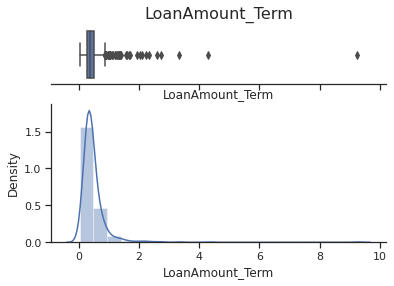

In [ ]:
for var in cols:
    if train[var].nunique() >= 10:
       univar_dist(train[cols],var, bins = 20,kde =True)

In [ ]:
## Bi-variate distribution
for var in cols:
    if train[var].nunique() >= 10:
       bivar_plt(train, var , bins = 7)
      #  univar_dist(train[cols],var, bins = 20,kde =True)

Variable Name : ApplicantIncome(by Approval Pct of Loan)
#######################################################################
        ApplicantIncome  Loan_Status
0   (149.999, 2430.714]    65.909091
1    (2430.714, 3000.0]    73.033708
2    (3000.0, 3507.143]    70.930233
3  (3507.143, 4182.286]    69.318182
4  (4182.286, 5413.286]    64.367816
5  (5413.286, 7760.143]    68.181818
6   (7760.143, 81000.0]    69.318182
#######################################################################


#######################################################################
Variable Name : CoapplicantIncome(by Approval Pct of Loan)
#######################################################################
      CoapplicantIncome  Loan_Status
0    (-0.001, 1607.571]    67.806268
1  (1607.571, 2131.714]    71.264368
2  (2131.714, 3166.429]    72.727273
3   (3166.429, 41667.0]    65.909091
#######################################################################


#######################################

Distribution of Sparse/Dummy Variables

In [ ]:
dummy_sparse_vars = []
for var in cols:
    if train[var].nunique() < 10:
       dummy_sparse_vars.append(var)

In [ ]:
var_distn(dummy_sparse_vars)

###############################
Self_Employed
-------------------------------
              Loan_Status                                             
                    count      mean       std  min  25%  50%  75%  max
Self_Employed                                                         
0                   532.0  0.687970  0.463758  0.0  0.0  1.0  1.0  1.0
1                    82.0  0.682927  0.468200  0.0  0.0  1.0  1.0  1.0
###############################
###############################
Credit_History
-------------------------------
               Loan_Status                                             
                     count      mean       std  min  25%  50%  75%  max
Credit_History                                                         
0.0                  139.0  0.316547  0.466811  0.0  0.0  0.0  1.0  1.0
1.0                  475.0  0.795789  0.403549  0.0  1.0  1.0  1.0  1.0
###############################
###############################
Dependents_0
-------------------

In [ ]:
# print(usr.num_contacts.quantile([.1,.2,.25,.3,.35,0.359,.36,.4,.5,.6,.75,.8,.9,.95,.96,.97,0.98,.99,0.995,1]))

In [ ]:
# Missing Value Imputation
# Replacing rest of the missing values with a distant value -999

train = train.fillna(-999)

In [ ]:
# train['Loan_Status'].value_counts()

## Preparing train and validation/test data sets

In [ ]:
## Split into train and test data
from sklearn.model_selection import train_test_split
## Here we are going with a one sample out validation of 20% random sampled from total training development data
X_train, X_test, y_train, y_test = train_test_split(train[cols], train['Loan_Status'], test_size= 0.20, random_state=22, stratify = train['Loan_Status'])

In [ ]:
## Checking Loan Approval Rate in train and test/in-time validation set
y_train.mean(), y_test.mean()

(0.6863543788187373, 0.6910569105691057)

In [ ]:
################################################################

## GBM Classifier

In [ ]:
from scipy.stats import uniform
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score ,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

At first we train the model with with default hyper parameters in order to see if there is any overfitting or underfitting problem coming up

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_clf = GradientBoostingClassifier()

gbm_fit = gbm_clf.fit(X_train[cols], y_train)

https://stats.stackexchange.com/questions/162162/relative-variable-importance-for-boosting

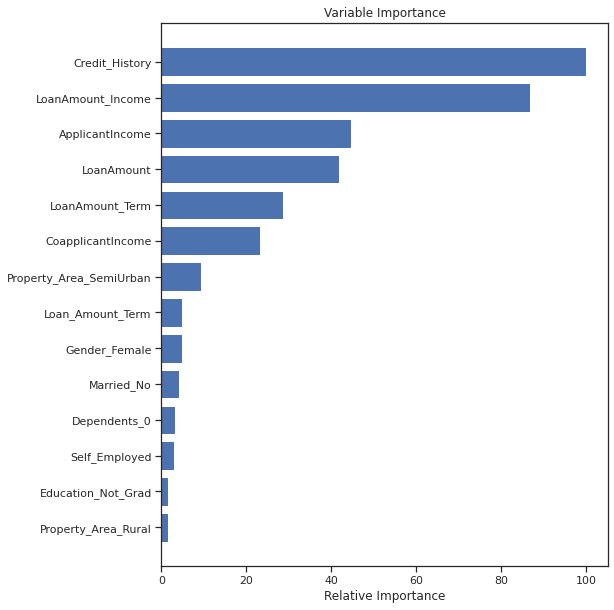

In [ ]:
feature_importance = gbm_fit.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train[cols].keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
pred_trn_gbm = gbm_fit.predict_proba(X_train[cols])
pred_tst_gbm = gbm_fit.predict_proba(X_test[cols])

pred_trn_gbm = pd.DataFrame(pred_trn_gbm)
pred_tst_gbm = pd.DataFrame(pred_tst_gbm)

In [ ]:
print("AUROC for Train is: ", roc_auc_score(y_train,pred_trn_gbm[1]))
print("AUROC for Test is: ", roc_auc_score(y_test,pred_tst_gbm[1]))

AUROC for Train is:  0.9779952984700759
AUROC for Test is:  0.7315789473684211


As one can observe there is a case of overfitting when we train with default parameters.
 We would try some hyper-parameter optimization techniques below in order to reduce that.

In [ ]:
## Hyper-parameter tuning with Random Search CV
import time
from sklearn.model_selection import RandomizedSearchCV

gbm = GradientBoostingClassifier()

## Here we are taking choosing some of the hyperparameters of GBM classifier which are commonly used by practitioners
## One can use other hyperparameters if one is inclined to experiment more usually these works okay in practice
param_grid_gbm = {
        'n_estimators':[100,200,300,500,1000],
        'learning_rate': [0.001,0.01,0.03,0.05,0.1,0.2],
        'subsample': [0.4,0.5,0.6,0.7,0.8],
        'max_depth' : [1,2,3,4,5], 
        'max_features': [0.5, 'sqrt', 'log2','auto'], 
        'min_impurity_decrease' :[0,0.001,0.01,0.1], 
        'min_samples_leaf': [1,5,10]
}

**Hyperparameter Description:**

        '**n_estimators**': Number of boosting stages to perform or simply no. of sequential trees to train
        '**learning_rate**':  the shrinkage of tree contribution after the first tree
        '**subsample**': fraction of samples to be used for fitting the individual base learners/weak learners (here the shalllow trees)
        '**max_depth**' :  max depth each tree can grow upto
        '**max_features**':  this part is similar to Random Forest feature subsampling
        '**min_impurity_decrease**' : weighted impurity decrease. A node will be split if this split induces a decrease of the impurity greater than or equal to the value. 
        It is calculated as,
        (N_t / N) * [impurity - (N_t_R / N_t) * right_impurity - (N_t_L / N_t) * left_impurity]
       where N is the total number of samples, N_t is the number of samples at the current node(parent node), N_t_L is the number of samples in the left child, and N_t_R is the number of samples in the right child.
       Here impurity is usually of two types Gini/Entropy. Most probably in this algorithm Entropy is used 
        Entropy is calculated as : sum over 1 to C [(−p_i*log(p_i))], where 	p_i is the frequency of label i at a node and C is the number of unique labels
        '**min_samples_leaf**': minimum number of samples required to be at a leaf node. If post splitting it is observed that any one of the split (left or right nodes will have less samples than minimun samples specified then the splits will not happen. This also acts as a tree complexity controlling parameter like max_depth and min_impurity_decrease

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds =5 
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
gbm_cv = RandomizedSearchCV(gbm, param_grid_gbm, n_iter=150,
                            n_jobs=-1, verbose=2, cv=skf.split(X_train[cols], y_train),
                            scoring='roc_auc', refit=False, random_state=42)  # neg_log_loss,  fit_params=fit_params1,
print("Randomized search..")
search_time_start = time.time()
gbm_cv.fit(X_train[cols], y_train)
print("Randomized search time:", time.time() - search_time_start)

best_score_gbm = gbm_cv.best_score_
best_params_gbm = gbm_cv.best_params_
print("Best score: {}".format(best_score_gbm))
print("Best params: ")
for param_name in sorted(best_params_gbm.keys()):
    print('%s: %r' % (param_name, best_params_gbm[param_name]))

Randomized search..
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.9min


Randomized search time: 202.7653305530548
Best score: 0.7719327933388087
Best params: 
learning_rate: 0.01
max_depth: 1
max_features: 'auto'
min_impurity_decrease: 0
min_samples_leaf: 1
n_estimators: 300
subsample: 0.4


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  3.4min finished


Just look across the best estomators after random search and compare them with original set, in the best is on the edge (on either side) , then one might consider few more samples in order to extend it in the appropriate direction. In this exercise I haven't exclusively done that, but should be tried.

In [ ]:
gbm_clf = GradientBoostingClassifier(learning_rate=best_params_gbm['learning_rate'] , 
                                   n_estimators=best_params_gbm['n_estimators'] ,
        subsample= best_params_gbm['subsample'],
        max_depth = best_params_gbm['max_depth'],
        max_features = best_params_gbm['max_features'] ,
        min_impurity_decrease = best_params_gbm['min_impurity_decrease'] ,
        min_samples_leaf = best_params_gbm['min_samples_leaf'])

gbm_fit = gbm_clf.fit(X_train[cols], y_train)

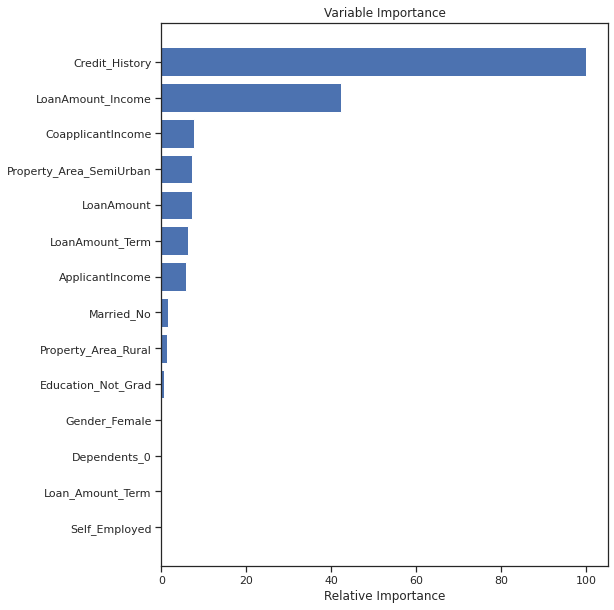

In [ ]:
feature_importance = gbm_fit.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train[cols].keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
pred_trn_gbm = gbm_fit.predict_proba(X_train[cols])
pred_tst_gbm = gbm_fit.predict_proba(X_test[cols])

pred_trn_gbm = pd.DataFrame(pred_trn_gbm)
pred_tst_gbm = pd.DataFrame(pred_tst_gbm)

In [ ]:
print("AUROC for Train is: ", roc_auc_score(y_train,pred_trn_gbm[1]))
print("AUROC for Test is: ", roc_auc_score(y_test,pred_tst_gbm[1]))

AUROC for Train is:  0.8094146209873212
AUROC for Test is:  0.7360681114551083


2-stage hyper parameter optimization

In [ ]:
##  Stage 1: Tune the complexity parameters
import time
from sklearn.model_selection import RandomizedSearchCV

gbm = GradientBoostingClassifier()

param_grid_gbm = {
        # 'n_estimators':[100,200,300,500,1000],
        # 'learning_rate': [0.001,0.01,0.03,0.05,0.1,0.2],
        'subsample': [0.4,0.5,0.6,0.7,0.8],
        'max_depth' : [1,2,3,4,5], 
        'max_features': [0.5, 'sqrt', 'log2','auto'], 
        'min_impurity_decrease' :[0,0.001,0.01,0.1], 
        'min_samples_leaf': [1,5,10]
}

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds =5 
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
gbm_cv = RandomizedSearchCV(gbm, param_grid_gbm, n_iter=150,
                            n_jobs=-1, verbose=2, cv=skf.split(X_train[cols], y_train),
                            scoring='roc_auc', refit=False, random_state=42)  # neg_log_loss,  fit_params=fit_params1,
print("Randomized search..")
search_time_start = time.time()
gbm_cv.fit(X_train[cols], y_train)
print("Randomized search time:", time.time() - search_time_start)

best_score_gbm = gbm_cv.best_score_
best_params_gbm = gbm_cv.best_params_
print("Best score: {}".format(best_score_gbm))
print("Best params: ")
for param_name in sorted(best_params_gbm.keys()):
    print('%s: %r' % (param_name, best_params_gbm[param_name]))

Randomized search..
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   45.4s


Randomized search time: 53.15576434135437
Best score: 0.7767384849943829
Best params: 
max_depth: 1
max_features: 'sqrt'
min_impurity_decrease: 0.1
min_samples_leaf: 5
subsample: 0.7


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   53.1s finished


In [ ]:
 ##################################################################################

Learning rate and number of trees has a relationship. As we increase the learning rate we have to decrease the no. of trees by that multiple and vice-versa.

In [ ]:
## Stage 2: learning rate and n_estimator optimization
import time
from sklearn.model_selection import RandomizedSearchCV

gbm_1 = GradientBoostingClassifier()

param_grid_gbm_1 = {
        'n_estimators':[500,1000,1500],
        'learning_rate': [0.001,0.01,0.03,0.05,0.1,0.2,0.3],
        'subsample': [best_params_gbm['subsample'], best_params_gbm['subsample'] ],
        'max_depth' : [best_params_gbm['max_depth'],best_params_gbm['max_depth']],
        'max_features': [best_params_gbm['max_features'], best_params_gbm['max_features']],
        'min_impurity_decrease' :[best_params_gbm['min_impurity_decrease'],  best_params_gbm['min_impurity_decrease']],
        'min_samples_leaf': [best_params_gbm['min_samples_leaf'],best_params_gbm['min_samples_leaf']]
 
}


In [ ]:
param_grid_gbm_1

{'learning_rate': [0.001, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3],
 'max_depth': [1, 1],
 'max_features': ['sqrt', 'sqrt'],
 'min_impurity_decrease': [0.1, 0.1],
 'min_samples_leaf': [5, 5],
 'n_estimators': [500, 1000, 1500],
 'subsample': [0.7, 0.7]}

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds =5 
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
gbm_cv_1 = RandomizedSearchCV(gbm_1, param_grid_gbm_1, n_iter=50,
                            n_jobs=-1, verbose=2, cv=skf.split(X_train[cols], y_train),
                            scoring='roc_auc', refit=False, random_state=42)  # neg_log_loss,  fit_params=fit_params1,
print("Randomized search..")
search_time_start = time.time()
gbm_cv_1.fit(X_train[cols], y_train)
print("Randomized search time:", time.time() - search_time_start)

best_score_gbm_1 = gbm_cv_1.best_score_
best_params_gbm_1 = gbm_cv_1.best_params_
print("Best score: {}".format(best_score_gbm))
print("Best params: ")
for param_name in sorted(best_params_gbm_1.keys()):
    print('%s: %r' % (param_name, best_params_gbm_1[param_name]))

Randomized search..
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min


Randomized search time: 116.4658145904541
Best score: 0.7767384849943829
Best params: 
learning_rate: 0.001
max_depth: 1
max_features: 'sqrt'
min_impurity_decrease: 0.1
min_samples_leaf: 5
n_estimators: 1500
subsample: 0.7


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.9min finished


In [ ]:
gbm_clf = GradientBoostingClassifier(learning_rate=best_params_gbm_1['learning_rate'] , 
                                   n_estimators=best_params_gbm_1['n_estimators'] ,
        subsample= best_params_gbm_1['subsample'],
        max_depth = best_params_gbm_1['max_depth'] ,
        max_features = best_params_gbm_1['max_features'] ,
        min_impurity_decrease = best_params_gbm_1['min_impurity_decrease'] ,
        min_samples_leaf = best_params_gbm_1['min_samples_leaf'])

gbm_fit = gbm_clf.fit(X_train[cols], y_train)

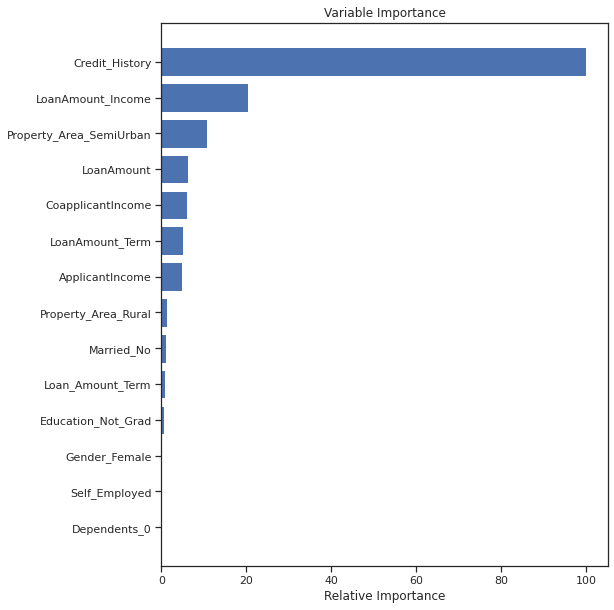

In [ ]:
feature_importance = gbm_fit.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train[cols].keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
pred_trn_gbm = gbm_fit.predict_proba(X_train[cols])
pred_tst_gbm = gbm_fit.predict_proba(X_test[cols])

pred_trn_gbm = pd.DataFrame(pred_trn_gbm)
pred_tst_gbm = pd.DataFrame(pred_tst_gbm)

In [ ]:
print("AUROC for Train is: ", roc_auc_score(y_train,pred_trn_gbm[1]))
print("AUROC for Test is: ", roc_auc_score(y_test,pred_tst_gbm[1]))

AUROC for Train is:  0.8130660141045898
AUROC for Test is:  0.7529411764705882


In [ ]:
###################################################################################################################

## Xgboost

Xgboost is usually known as regularized gradient boosting. Unlike usual gradient boosting the loss function comprises of a regularization part too. Each tree is regularized for number of terminal/leaf nodes and the vector of leaf scores

Algorithmic advantages are:

1) Uses split features algorithm like histogram, where a continuous feature is
discretized into bins and then finds the best split among those bins only

2) Parallel Learning: In order to reduce sorting time which is most important aspect of a tree algorithm, here the data is stored in-memory or column blocks. Each block has data columns sorted by the corresponding feature value. This computation needs to be done only once before training and can be reused later.
Sorting of blocks can be done independently and can be divided between parallel threads of the CPU. The split finding can be parallelized as the collection of statistics for each column is done in parallel.

3) XGBoost has an in-built routine to handle missing values.Although if one desires missing value imputation can be done prior to training

4) Another parallelisation happens during the construction of each trees, at a very low level. Each independent branches of the tree are trained separately. All the cores available are used by xgboost to do this. Although sequential creation of trees cannot be parallelized logically. There are few drawbacks to this approach of paralellisation, the overhead. Before parallel computation, data has to be sent to each cores. Thus parallelising at such a low level might not be the best idea. Instead we would give the entire dataset to each core and let it train a full model by itself. 

5) Pruning of the tree: XGBoost  makes splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain

6) One can use the DMatrix, which is an internal data structure that is used by XGBoost, which is optimized for both memory efficiency and training speed. In this case I haven't used it, since I havejust continued with data prepared from GBM. (example: dtrain = xgb.DMatrix(data=X_train, label=y_train)

https://xgboost.readthedocs.io/en/latest/tutorials/model.html#


https://datascience.stackexchange.com/questions/12318/how-to-interpret-the-output-of-xgboost-importance


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score ,roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

https://xgboost.readthedocs.io/en/latest/python/python_api.html?highlight=feature_importances_#xgboost.XGBClassifier.feature_importances_

### base xgb model, with default hyperparameters

In [ ]:
xgb_cl = xgb.XGBClassifier(objective='binary:logistic',eval_metric = 'auc')

xgb_fit = xgb_cl.fit(X_train[cols], y_train)

In case of binary classification the evaluation metric can be changed to other defined metrics in the "Parameter List" like 'aucpr' or 'logloss'. Here one can also add a customized metric such as F-beta score

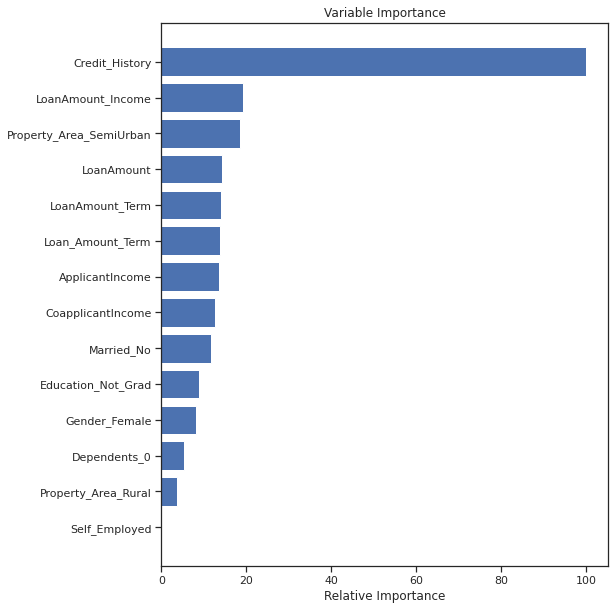

In [ ]:
feature_importance = xgb_cl.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train[cols].keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
pred_trn_xgb = xgb_fit.predict_proba(X_train[cols])
pred_tst_xgb = xgb_fit.predict_proba(X_test[cols])

pred_trn_xgb = pd.DataFrame(pred_trn_xgb)
pred_tst_xgb = pd.DataFrame(pred_tst_xgb)

In [ ]:
print("AUROC for Train is: ", roc_auc_score(y_train,pred_trn_xgb[1]))
print("AUROC for Test is: ", roc_auc_score(y_test,pred_tst_xgb[1]))

AUROC for Train is:  0.9460672858298971
AUROC for Test is:  0.7142414860681114


### Hyperparameter optimization with random search cv




In [ ]:
import time

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb_cl = XGBClassifier(missing = -999, scale_pos_weight=1)

param_grid_xgb = {
        'silent': [False],
        'max_depth': [2,3,4,5],
        'learning_rate': [0.001, 0.01,0.05, 0.1, 0.2],
        'subsample': [0.5, 0.6, 0.7, 0.8],
        'colsample_bytree': [0.2,0.4, 0.5, 0.6, 0.7],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8],
        'min_child_weight': [0.3,0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.01,0.05,0.1,0.5, 1.0, 5.0, 10.0, 50.0],
        'reg_alpha':[0.01,0.05,0.1,0.5, 1.0, 5.0, 10.0, 50.0],
        'n_estimators': [100,200,300.500]}


**Hyperparameter Description:**

        '**n_estimators**': Number of boosting stages to perform or simply no. of sequential trees to train
        '**learning_rate**':  the shrinkage of tree contribution after the first tree
        '**colsample_bytree**': Takes a default value of 1. Ranges from (0,1]. fraction of samples to be used for fitting the individual base learners/weak learners (here the shalllow trees). This happens while forming each new tree
        '**colsample_bylevel**': This happens while forming each new level/depth of a tree
        '**colsample_bynode**': This happens while forming new node in a tree
        '**max_depth**' :  max depth each tree can grow upto
        '**lambda**' : L2 regularization term on weights or  the vector of scores on leaves
        '**alpha**' : L1 regularization term on weights or the vector of scores on leaves
        '**gamma**' : Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be. Takes all values >= 0 (default value: 0). This is also known as min_split_loss, since it essentially regularizes no. of leaves
        '**scale_pos_weight**' : Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances)



https://stats.stackexchange.com/questions/317073/explanation-of-min-child-weight-in-xgboost-algorithm#:~:text=The%20definition%20of%20the%20min_child_weight,hessian)%20needed%20in%20a%20child.&text=In%20linear%20regression%20mode%2C%20this,conservative%20the%20algorithm%20will%20be.

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds =5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
xgb_cv = RandomizedSearchCV(xgb_cl, param_grid_xgb, n_iter=150,
                            n_jobs=-1, verbose=2, cv=skf.split(X_train[cols], y_train),
                            scoring='roc_auc', refit=False, random_state=42)  
print("Randomized search..")
search_time_start = time.time() 
xgb_cv.fit(X_train[cols], y_train)
print("Randomized search time:", time.time() - search_time_start)

best_score = xgb_cv.best_score_
best_params = xgb_cv.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    4.1s


Randomized search time: 18.5747811794281
Best score: 0.7708908021562019
Best params: 
colsample_bylevel: 0.7
colsample_bytree: 0.6
gamma: 0.5
learning_rate: 0.001
max_depth: 4
min_child_weight: 7.0
n_estimators: 200
reg_alpha: 0.05
reg_lambda: 1.0
silent: False
subsample: 0.8


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   18.6s finished


In [ ]:
# fit model on training data using the best hyperparameters with tweaking a little bit
model_xgb = XGBClassifier(max_depth=best_params['max_depth'] , learning_rate=best_params['learning_rate'], n_estimators=best_params['n_estimators'], verbosity=1, 
                      objective='binary:logistic', booster='gbtree', tree_method='auto', n_jobs=-1,
                      eval_metric = 'auc',#num_class  = 2,
                      gamma=best_params['gamma'], min_child_weight=best_params['min_child_weight'], 
                      subsample=best_params['subsample'], 
                      colsample_bytree= best_params['colsample_bytree'], colsample_bylevel=best_params['colsample_bylevel'] ,
                      reg_alpha=0, reg_lambda=best_params['reg_lambda'], scale_pos_weight=1,  
                      alpha  = best_params['reg_alpha'],
                      base_score=0.5, random_state=42, missing=-999, num_parallel_tree=2, importance_type='gain')

# model_xgb.fit(X_train[low_vif_vars], y_train)
xgb_fit = model_xgb.fit(X_train[cols], y_train)

In [ ]:
pred_trn_xgb = xgb_fit.predict_proba(X_train[cols])
pred_tst_xgb = xgb_fit.predict_proba(X_test[cols])

pred_trn_xgb = pd.DataFrame(pred_trn_xgb)
pred_tst_xgb = pd.DataFrame(pred_tst_xgb)

In [ ]:
print("AUROC for Train is: ", roc_auc_score(y_train,pred_trn_xgb[1]))
print("AUROC for Test is: ", roc_auc_score(y_test,pred_tst_xgb[1]))

AUROC for Train is:  0.8460634321168446
AUROC for Test is:  0.7250773993808051


### 2-Stage Hyperparameter Optimization

In [ ]:
import time

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb_cl = XGBClassifier(missing = -999, scale_pos_weight=1)

param_grid_xgb = {
        'silent': [False],
        'max_depth': [2,3,4,5],
        #'learning_rate': [0.001, 0.01,0.05, 0.1, 0.2],
        'subsample': [0.5, 0.6, 0.7, 0.8],
        'colsample_bytree': [0.2,0.4, 0.5, 0.6, 0.7,0.8],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8],
        'min_child_weight': [0.3,0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.01,0.05,0.1,0.5, 1.0, 5.0, 10.0, 50.0],
        'reg_alpha':[0.01,0.05,0.1,0.5, 1.0, 5.0, 10.0, 50.0],
     #   'n_estimators': [100,200,300.500]
        }


In [ ]:
from sklearn.model_selection import StratifiedKFold
folds =5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
xgb_cv = RandomizedSearchCV(xgb_cl, param_grid_xgb, n_iter=150,
                            n_jobs=-1, verbose=2, cv=skf.split(X_train[cols], y_train),
                            scoring='roc_auc', refit=False, random_state=42)  
print("Randomized search..")
search_time_start = time.time() 
xgb_cv.fit(X_train[cols], y_train)
print("Randomized search time:", time.time() - search_time_start)

best_score = xgb_cv.best_score_
best_params = xgb_cv.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:   15.4s


Randomized search time: 18.60533118247986
Best score: 0.7745705061032598
Best params: 
colsample_bylevel: 0.4
colsample_bytree: 0.6
gamma: 0.5
max_depth: 3
min_child_weight: 5.0
reg_alpha: 5.0
reg_lambda: 10.0
silent: False
subsample: 0.8


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   18.6s finished


In [ ]:
## Stage 2: learning rate and n_estimator optimization
import time
from sklearn.model_selection import RandomizedSearchCV

xgb1_1 = XGBClassifier(missing = -999, scale_pos_weight=1)

param_grid_xgb_1 = {
            'silent': [False],
        'max_depth': [best_params['max_depth'], best_params['max_depth']],
         'learning_rate': [0.001,0.01,0.02, 0.03, 0.05,0.08, 0.1],
        'subsample': [best_params['subsample'], best_params['subsample']],
        'colsample_bytree': [best_params['colsample_bytree'], best_params['colsample_bytree']],
        'colsample_bylevel': [best_params['colsample_bylevel'], best_params['colsample_bylevel']],
        'min_child_weight': [best_params['min_child_weight'], best_params['min_child_weight']],
        'gamma': [best_params['gamma'], best_params['gamma']],
        'reg_lambda': [best_params['reg_lambda'], best_params['reg_lambda']],
        'reg_alpha':[best_params['reg_alpha'], best_params['reg_alpha']],
        'n_estimators': [100,200,300,500,700,1000]
 
}

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds =5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
xgb_cv = RandomizedSearchCV(xgb_cl, param_grid_xgb_1, n_iter=150,
                            n_jobs=-1, verbose=2, cv=skf.split(X_train[cols], y_train),
                            scoring='roc_auc', refit=False, random_state=42)  
print("Randomized search..")
search_time_start = time.time() 
xgb_cv.fit(X_train[cols], y_train)
print("Randomized search time:", time.time() - search_time_start)

best_score = xgb_cv.best_score_
best_params = xgb_cv.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 694 tasks      | elapsed:   54.6s


Randomized search time: 58.19877004623413
Best score: 0.7745705061032598
Best params: 
colsample_bylevel: 0.4
colsample_bytree: 0.6
gamma: 0.5
learning_rate: 0.1
max_depth: 3
min_child_weight: 5.0
n_estimators: 100
reg_alpha: 5.0
reg_lambda: 10.0
silent: False
subsample: 0.8


[Parallel(n_jobs=-1)]: Done 747 out of 750 | elapsed:   58.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   58.2s finished


In [ ]:
# fit model on training data using the best hyperparameters with tweaking a little bit
model_xgb = XGBClassifier(max_depth=best_params['max_depth'] ,  verbosity=1,  learning_rate=best_params['learning_rate'], n_estimators=best_params['n_estimators'],
                      objective='binary:logistic', booster='gbtree', tree_method='auto', n_jobs=-1,
                      eval_metric = 'auc',# num_class  = 2,
                      gamma=best_params['gamma'], min_child_weight=best_params['min_child_weight'], 
                      subsample=best_params['subsample'], 
                      colsample_bytree= best_params['colsample_bytree'], colsample_bylevel=best_params['colsample_bylevel'] ,
                      reg_alpha=0, reg_lambda=best_params['reg_lambda'], scale_pos_weight=1,  
                      alpha  = best_params['reg_alpha'],
                      base_score=0.5, random_state=42, missing=-999, num_parallel_tree=2, importance_type='gain')
# 
# model_xgb.fit(X_train[low_vif_vars], y_train)
xgb_fit = model_xgb.fit(X_train[cols], y_train)

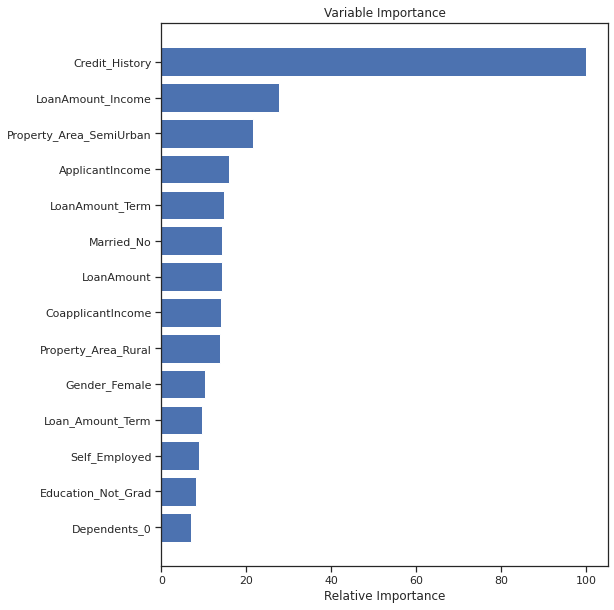

In [ ]:
feature_importance = xgb_fit.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train[cols].keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
pred_trn_xgb = xgb_fit.predict_proba(X_train[cols])
pred_tst_xgb = xgb_fit.predict_proba(X_test[cols])

pred_trn_xgb = pd.DataFrame(pred_trn_xgb)
pred_tst_xgb = pd.DataFrame(pred_tst_xgb)

In [ ]:
print("AUROC for Train is: ", roc_auc_score(y_train,pred_trn_xgb[1]))
print("AUROC for Test is: ", roc_auc_score(y_test,pred_tst_xgb[1]))

AUROC for Train is:  0.8689352190835872
AUROC for Test is:  0.7411764705882353


In [ ]:
############################################################################################

In [ ]:
y= y_train

In [ ]:
X = X_train[['Credit_History','LoanAmount_Income']]

In [ ]:
m = xgb.XGBClassifier(max_depth=1, n_estimators=2).fit(X, y)
m.get_booster().get_dump()

['0:[Credit_History<0.5] yes=1,no=2,missing=1\n\t1:leaf=-0.0727272779\n\t2:leaf=0.114652954\n',
 '0:[Credit_History<0.5] yes=1,no=2,missing=1\n\t1:leaf=-0.0658058748\n\t2:leaf=0.103654362\n']

In [ ]:
# m.get_booster().dump_model("out.txt")

https://datascience.stackexchange.com/questions/57905/how-to-extract-trees-in-xgboost

https://stackoverflow.com/questions/37677496/how-to-get-access-of-individual-trees-of-a-xgboost-model-in-python-r

In [ ]:
1/(1+exp(-0.72 + 0.1*-0.065)*(-1)) = prob

https://stackoverflow.com/questions/37213270/weight-calculation-of-individual-tree-in-xgboost-when-using-binarylogistic